                    EXPLORATORY DATA ANALYSIS FOR PHARMAOUTICAL DATA        

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
 
#import warnings

plt.style.use('ggplot')  
sns.set(style="whitegrid")


In [19]:
import pandas as pd

pd.set_option('display.max_rows', 100)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000) 

train = pd.read_csv('../rossmann-store-sales/train.csv', dtype={'StateHoliday': 'str'}, low_memory=False)
test = pd.read_csv('../rossmann-store-sales/test.csv', low_memory=False)
store = pd.read_csv('../rossmann-store-sales/store.csv', low_memory=False)


print("First few rows of the train data:")
print(train.head())

print("\nInfo about the train data:")
print(train.info())

print("\nInfo about the store data:")
print(store.info())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')


First few rows of the train data:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  SchoolHoliday
0      1          5  2015-07-31   5263        555     1      1            0              1
1      2          5  2015-07-31   6064        625     1      1            0              1
2      3          5  2015-07-31   8314        821     1      1            0              1
3      4          5  2015-07-31  13995       1498     1      1            0              1
4      5          5  2015-07-31   4822        559     1      1            0              1

Info about the train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Custo

In [20]:

                            #data cleaninig pipline

print(train.isnull().sum())
print(store.isnull().sum())

train['Customers'] = train['Customers'].fillna(train['Customers'].median())
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

train = train[train['Sales'] > 0]  

train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

train['Month'] = train['Date'].dt.month
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['Year'] = train['Date'].dt.year


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


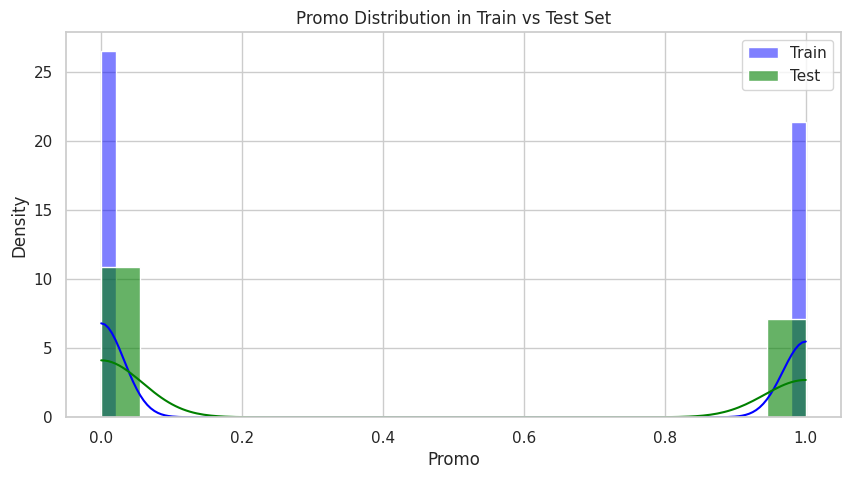

In [21]:

plt.figure(figsize=(10, 5))
sns.histplot(train['Promo'], color='blue', kde=True, label='Train', stat='density')
sns.histplot(test['Promo'], color='green', kde=True, label='Test', alpha=0.6, stat='density')
plt.title("Promo Distribution in Train vs Test Set")
plt.legend()
plt.show()

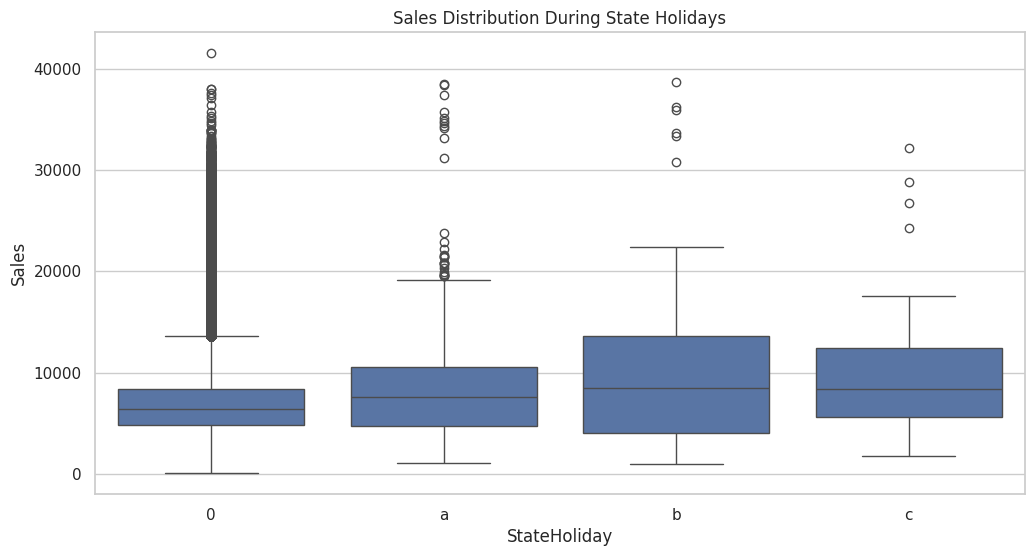

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='StateHoliday', y='Sales', data=train)
plt.title('Sales Distribution During State Holidays')
plt.show()

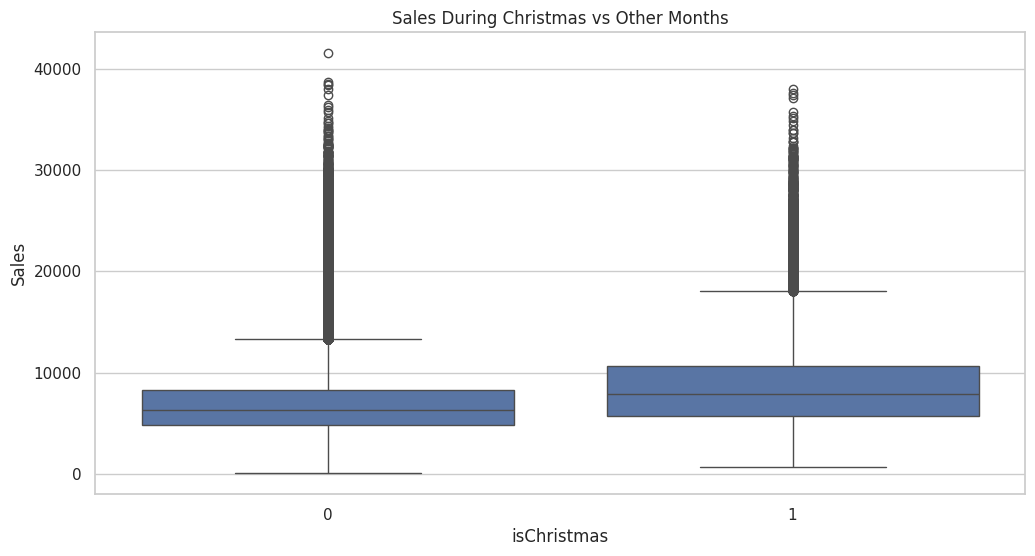

In [23]:
train['isChristmas'] = (train['Month'] == 12).astype(int)
plt.figure(figsize=(12, 6))
sns.boxplot(x='isChristmas', y='Sales', data=train)
plt.title('Sales During Christmas vs Other Months')
plt.show()

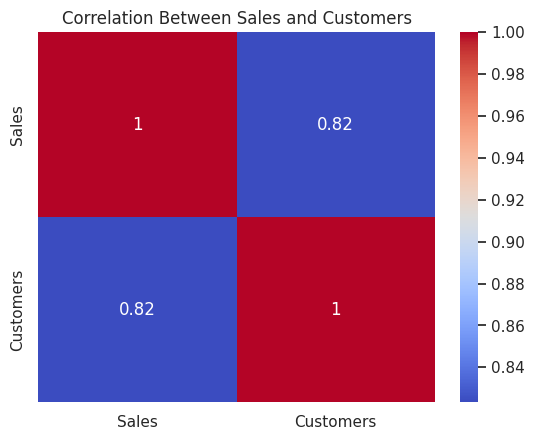

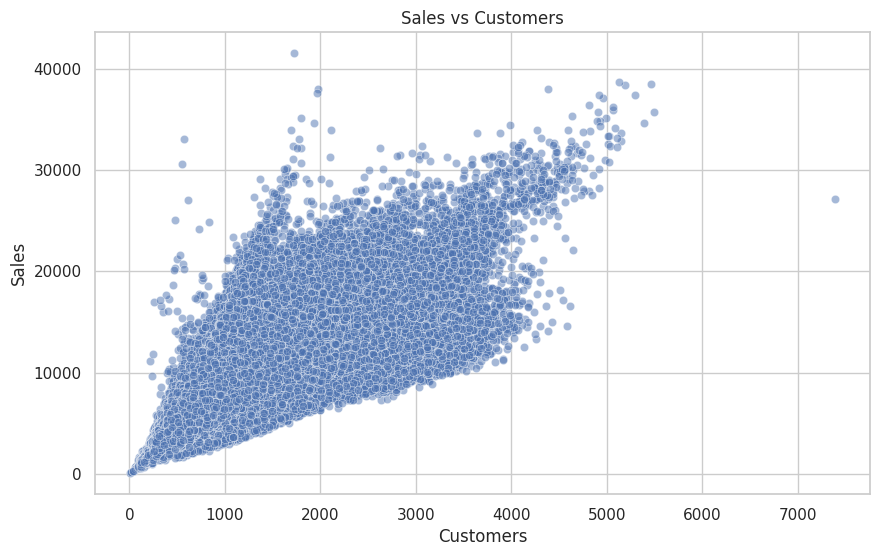

In [24]:
corr_matrix = train[['Sales', 'Customers']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales and Customers')    
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train, alpha=0.5)
plt.title('Sales vs Customers')
plt.show()

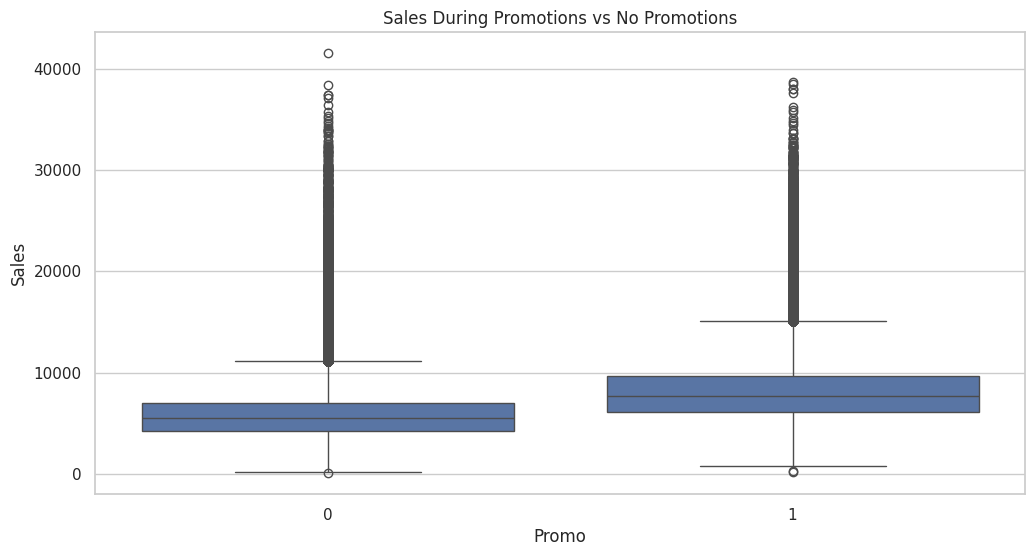

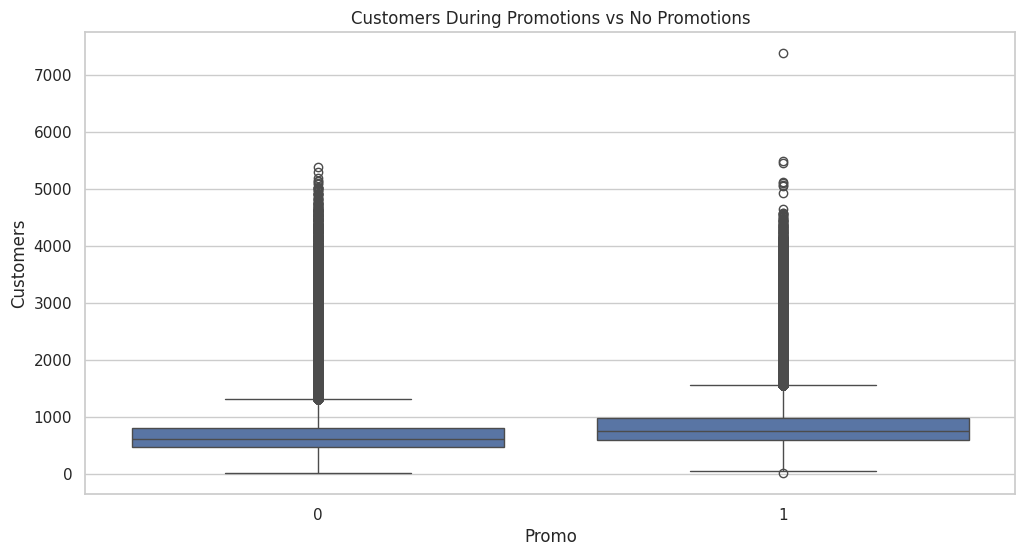

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo', y='Sales', data=train)
plt.title('Sales During Promotions vs No Promotions')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo', y='Customers', data=train)
plt.title('Customers During Promotions vs No Promotions')
plt.show()

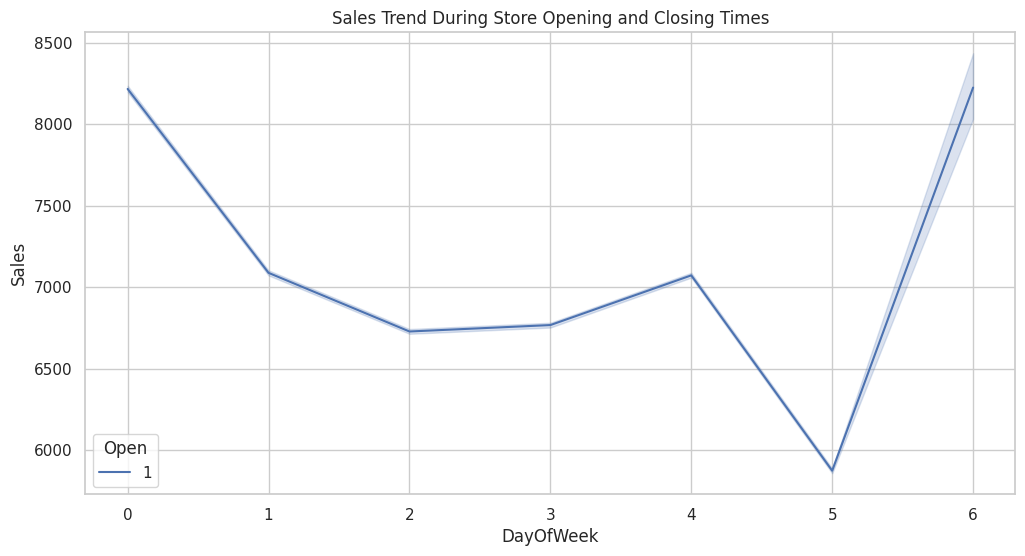

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DayOfWeek', y='Sales', data=train, hue='Open')
plt.title('Sales Trend During Store Opening and Closing Times')
plt.show()

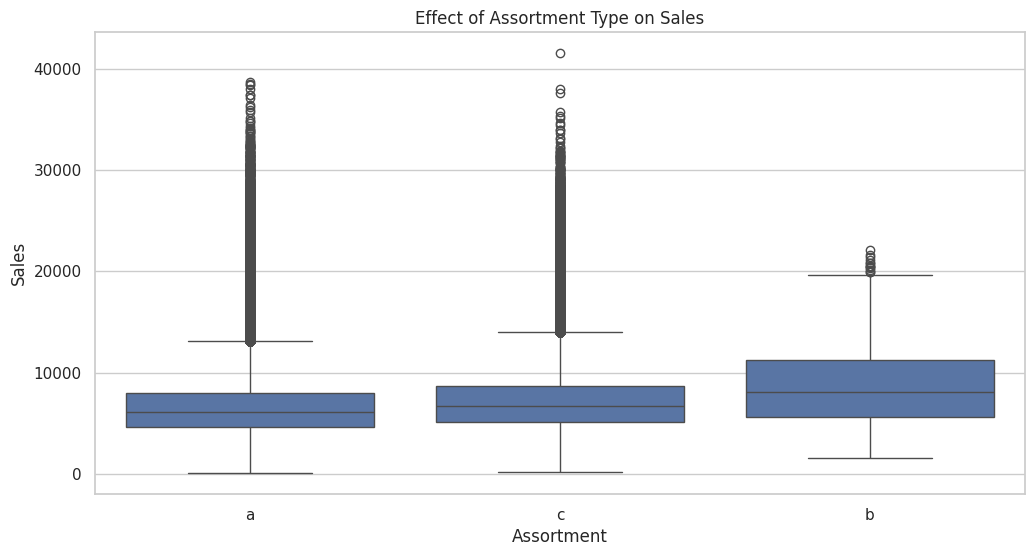

In [27]:
train_store = pd.merge(train, store, on='Store')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Sales', data=train_store)
plt.title('Effect of Assortment Type on Sales')
plt.show()

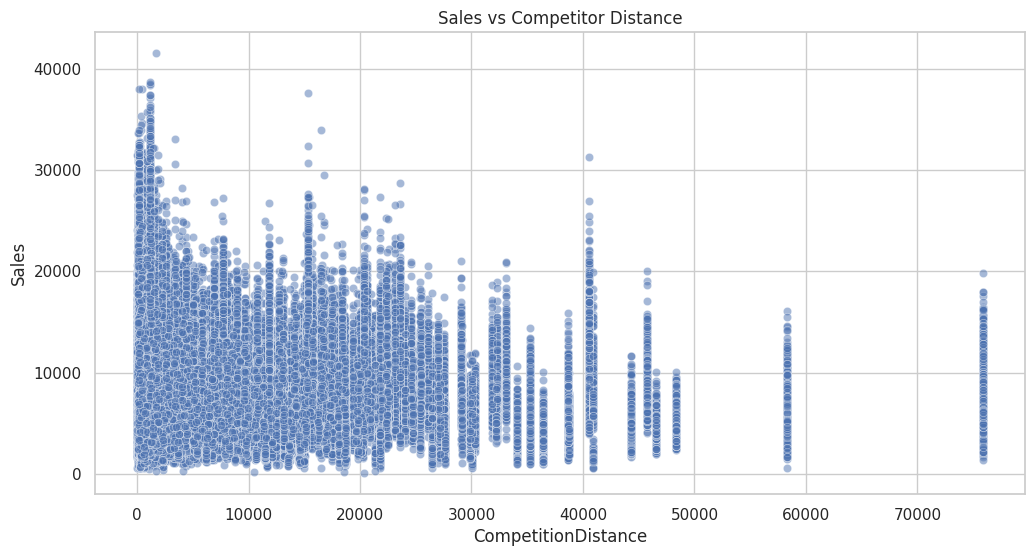

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_store, alpha=0.5)
plt.title('Sales vs Competitor Distance')
plt.show()

stores_with_competition = store[(store['CompetitionDistance'].isnull()) & 
                                (store['CompetitionOpenSinceMonth'].notnull())]
print(stores_with_competition.head())